In [1]:
import mediapipe as mp
import cv2
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy.signal import find_peaks
from statistics import stdev,mean
import itertools as itr
import pprint, pickle
import seaborn as sns

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [4]:
cap = cv2.VideoCapture("/home/jayasanka/Documents/gait recognition/Data set/1/front1.webm")

#check the fps
#fps = cap.get(cv2.CAP_PROP_FPS) 
#print(fps)

myarray = np.empty(shape=(1,33,4))

start = time.time()

# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    idx=0
    while cap.isOpened():
        ret, frame = cap.read()
        
        #set specific frames sequence by vedio
        #cap.set(cv2.CAP_PROP_POS_FRAMES, idx* 4)
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # Recolor image back to BGR for rendering
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
        #print(results.pose_landmarks)
        #print("--------------------------------------")
        
        if results.pose_landmarks != None:
            key_list= []
            t=time.time()
            for data_point in results.pose_landmarks.landmark:
                key_list.append([data_point.x,data_point.y,data_point.z,t])    
            mat = np.array(key_list)
            myarray = np.vstack([myarray,[mat]])
        
        idxx=time.time()
        idx+=1
        #path="/media/jayasanka/New Volume/cs/AI/gait recognition/Full-Body-Estimation-using-Media-Pipe-Holistic/frames3"
        #cv2.imwrite(os.path.join(path , '{}.png'.format(idxx)),image)
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            idx=0
            
            
end = time.time()
print(end - start)
cap.release()
cv2.destroyAllWindows()



248.93175601959229


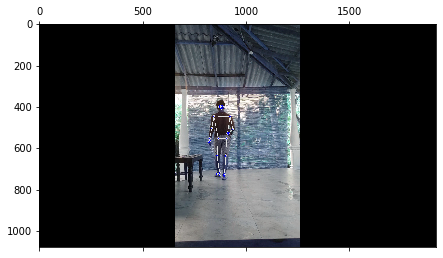

In [5]:
plt.matshow(image)

In [6]:
#np.set_printoptions(threshold=np.inf)
print(myarray)

[[[ 6.94475252e-310  6.94475252e-310  3.72086371e-316  3.72086371e-316]
  [ 0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000]
  [ 0.00000000e+000  5.30132438e-321  6.94475252e-310  3.72083526e-316]
  ...
  [-0.00000000e+000  8.74496193e-322  3.75124045e-316  3.72355380e-316]
  [ 3.72087478e-316  1.06099790e-314  2.37151510e-322  2.37151510e-322]
  [ 3.72356487e-316  3.95252517e-323  3.72189611e-316  3.72299729e-316]]

 [[ 4.54741299e-001  3.67600590e-001 -9.42338407e-002  1.65168459e+009]
  [ 4.57447886e-001  3.60550225e-001 -8.81891474e-002  1.65168459e+009]
  [ 4.59041119e-001  3.60779285e-001 -8.81873593e-002  1.65168459e+009]
  ...
  [ 4.51443851e-001  6.78323627e-001  6.47748411e-002  1.65168459e+009]
  [ 4.76701736e-001  6.92289412e-001  2.92380713e-002  1.65168459e+009]
  [ 4.47081864e-001  6.95594132e-001  2.22370010e-002  1.65168459e+009]]

 [[ 4.54741269e-001  3.67527276e-001 -1.13333456e-001  1.65168459e+009]
  [ 4.57447261e-001  3.60494763e-001 -1.06044598

In [7]:
key_array = np.delete(myarray, 0, 0)
np.set_printoptions(threshold=np.inf)
print(key_array.shape)
print(len(key_array))

(3191, 33, 4)
3191


In [8]:
#arr_reshaped = key_array.reshape(key_array.shape[0], -1)
#np.savetxt("keys.txt", arr_reshaped )
#np.savetxt("shape.txt", key_array.shape )

# functions

In [3]:
def get_peaks(df,y,prom):
    peaks, _ = find_peaks(-y,prominence=prom)
    plt.figure(figsize=(20,5))
    plt.plot(df.t,y)
    plt.plot(df.t[peaks], y[peaks],"X",markerfacecolor='red',markersize=8)
    plt.show()
    return peaks

In [4]:
def time_diff(peaks):
    array=[]
    for i in range(len(peaks)-1):
        td=df.t[peaks[i+1]]-df.t[peaks[i]]
        array.append(td)
    return array

In [5]:
def distribution(data):
    ax=sns.distplot(data,
                kde=True,
                bins=8,
                color='blue',
                hist_kws={"linewidth": 22,'alpha':0.60})
    ax.set(xlabel='Binomial',ylabel='Frequency')
    plt.show()

In [6]:
def sample(df,strike_peak,time_return_points):
    a = np.array(df.t[strike_peak])
    sample_strikes=[]
    for i in range(len(time_return_points)-1):
        index=np.where(np.logical_and(a>=time_return_points.t[i], a<=time_return_points.t[i+1]))
        s = list(map(lambda a : df.t[strike_peak[a]], index[0]))
        sample_strikes.append(s)
    return sample_strikes

In [7]:
def strides(sample_strikes):
    strides=[]
    for strike in sample_strikes:
        sample=[]
        for i in range(len(strike)-1):
            t_diff=strike[i+1]-strike[i]
            sample.append(t_diff)
        strides.append(sample)
    return strides

In [8]:
def remove_time_gap(data):
    from statistics import stdev,mean
    SD=stdev(data)
    m= mean(data)
 
    cut_off = SD * 0.5
    upper =  m + cut_off
    array = [x for x in data if x < upper]
    return array
    

In [9]:
def remove_distinc(array,df,Time_to_index_ratio,y):
    modified_mean= mean(array)
    Distance=Time_to_index_ratio*modified_mean*0.5
    
    peaks, _ = find_peaks(-y,prominence=0.03,distance=Distance)
    plt.figure(figsize=(20,5))
    plt.plot(df.t,y)
    plt.plot(df.t[peaks], y[peaks],"X",markerfacecolor='red',markersize=8)
    plt.show()
    return peaks
    

In [10]:
def com(A,B):
    if type(A)==np.ndarray:
        C= A.tolist()
    else:
        C=A
    for i,v in enumerate(B):
        C.insert(2*i+1,v) 
    return C

In [12]:
names=['amani','gayanjali','harshi','hasitha','isurika','gihan','jayasanka','chathura','geemanthi','damith']

In [598]:
name=names[9]

In [599]:
f_file = open('key_data/key_array_{}_front.pkl'.format(name), 'rb')

key_array = pickle.load(f_file)
#pprint.pprint(fT)

f_file.close()

# upper body height

In [600]:
import math

In [601]:
H=[]
for i in range(len(key_array)):
    #time
    t=key_array[i][12][3]
    #upper body height
    ubh=abs((key_array[i][11][1]+key_array[i][12][1])-(key_array[i][23][1]+key_array[i][24][1]))/2
    #shoulder length
    sl=abs(key_array[i][11][0]-key_array[i][12][0])
    #center of upper body in depth
    center=(key_array[i][11][2]+key_array[i][12][2]+key_array[i][23][2]+key_array[i][24][2])/4
    
    #
    heel_r=abs(key_array[i][24][1]-key_array[i][30][1])
    foot_index_r=abs(key_array[i][24][1]-key_array[i][32][1])
    heel_l=abs(key_array[i][23][1]-key_array[i][29][1])
    foot_index_l=abs(key_array[i][23][1]-key_array[i][31][1])
    #sldir=key_array[i][11][0]-key_array[i][12][0]
    right=key_array[i][12][0]
    left=key_array[i][11][0]
    H.append([ubh])
    H[i].append(t)
    H[i].append(sl)
    H[i].append(sl/ubh)
    H[i].append(center)
    H[i].append(right)
    H[i].append(left)
    #H[i].append(sldir)
    H[i].append(heel_r)
    H[i].append(foot_index_r)
    H[i].append(heel_l)
    H[i].append(foot_index_l)
H_array = np.array(H)
print(H_array)

[[7.97545463e-02 5.15282726e+00 5.32484055e-02 ... 1.31398141e-01
  1.17837012e-01 1.32084131e-01]
 [8.25136900e-02 5.27367759e+00 5.51378131e-02 ... 1.32328212e-01
  1.15481079e-01 1.27786636e-01]
 [8.14375132e-02 5.37625384e+00 5.40227294e-02 ... 1.34270430e-01
  1.11046433e-01 1.21773183e-01]
 ...
 [2.64014468e-01 4.08774762e+03 3.30928564e-02 ... 3.85316551e-01
  4.01016951e-01 4.13884342e-01]
 [2.61510447e-01 4.08786255e+03 3.47305536e-02 ... 3.87315154e-01
  4.00647342e-01 4.17026818e-01]
 [2.59858802e-01 4.08797636e+03 3.55238914e-02 ... 3.81144285e-01
  4.01651680e-01 4.17640746e-01]]


In [602]:
df = pd.DataFrame(H_array,columns=['ubh','t','sl','sln','center','r_sdr','l_sdr','h_R','f_R','h_L','f_L'])
print(df)

            ubh            t        sl       sln    center     r_sdr  \
0      0.079755     5.152827  0.053248  0.667654 -0.086548  0.603388   
1      0.082514     5.273678  0.055138  0.668226 -0.066823  0.600355   
2      0.081438     5.376254  0.054023  0.663364 -0.051940  0.605712   
3      0.079631     5.477815  0.054513  0.684565 -0.064243  0.604281   
4      0.080311     5.581614  0.054419  0.677604 -0.069311  0.603178   
...         ...          ...       ...       ...       ...       ...   
36499  0.266272  4087.522390  0.031528  0.118407 -0.092827  0.593685   
36500  0.264040  4087.635453  0.031812  0.120484 -0.078450  0.591892   
36501  0.264014  4087.747621  0.033093  0.125345 -0.083492  0.590968   
36502  0.261510  4087.862554  0.034731  0.132808 -0.083657  0.590133   
36503  0.259859  4087.976364  0.035524  0.136705 -0.085750  0.589890   

          l_sdr       h_R       f_R       h_L       f_L  
0      0.656637  0.118275  0.131398  0.117837  0.132084  
1      0.655492  0.

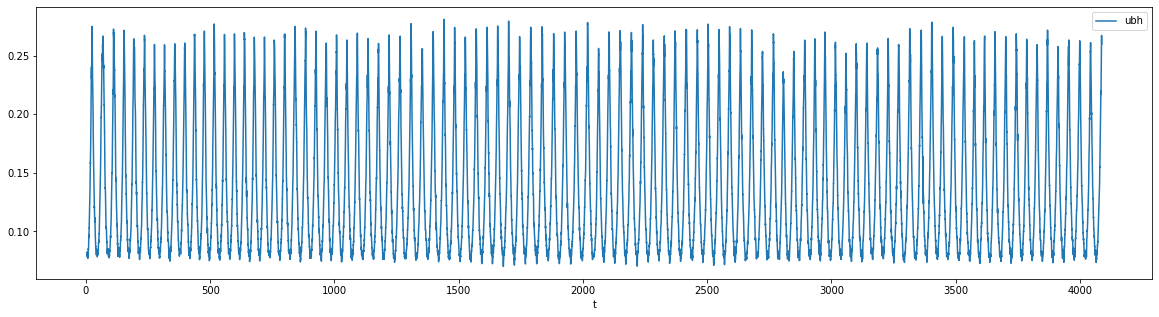

In [603]:
df.plot(x ='t', y='ubh', kind = 'line',figsize=(20,5))
#plt.ylim(0,0.2)
plt.show()

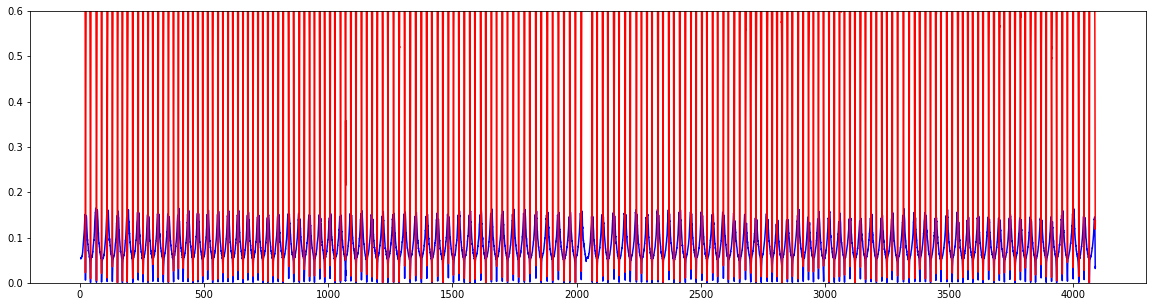

In [604]:
plt.figure(figsize=(20,5))
plt.plot(df.t,df.sl,'b')
plt.plot(df.t,df.sln,'r')
plt.ylim(0,0.6)
plt.show()

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


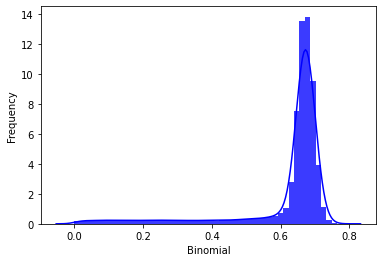

In [605]:

from scipy.stats import binom
data=df.sln
ax=sns.distplot(data,
                kde=True,
                color='blue',
                hist_kws={"linewidth": 22,'alpha':0.77})
ax.set(xlabel='Binomial',ylabel='Frequency')
plt.show()

In [606]:
from scipy import signal
b, a = signal.butter(1, 0.1, btype='lowpass', analog=False)
low_passed = signal.filtfilt(b, a, df.ubh)

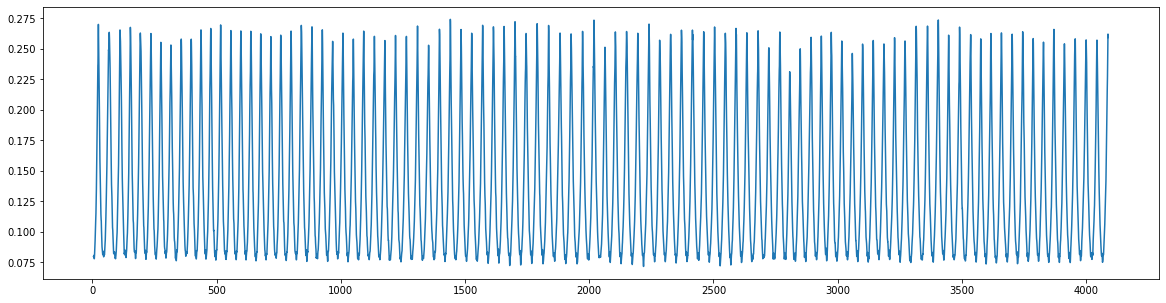

In [607]:
plt.figure(figsize=(20,5))
plt.plot(df.t,low_passed)
plt.show()

# walking direction

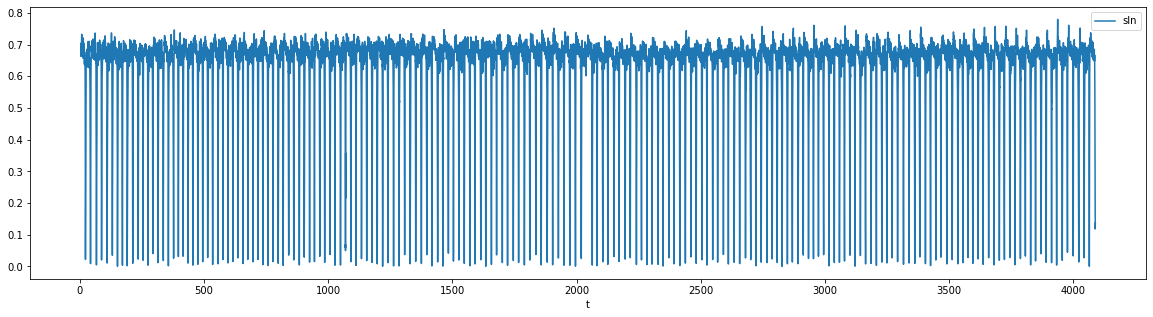

In [608]:
df.plot(x ='t', y='sln', kind = 'line',figsize=(20,5))
#plt.ylim(0,0.2)
plt.show()

     index            t
0      170    23.928591
1      362    44.272630
2      581    68.136858
3      778    88.613126
4      982   111.210017
..     ...          ...
185  35512  3975.724516
186  35714  3998.934372
187  35917  4021.256231
188  36105  4042.852646
189  36294  4063.735409

[190 rows x 2 columns]


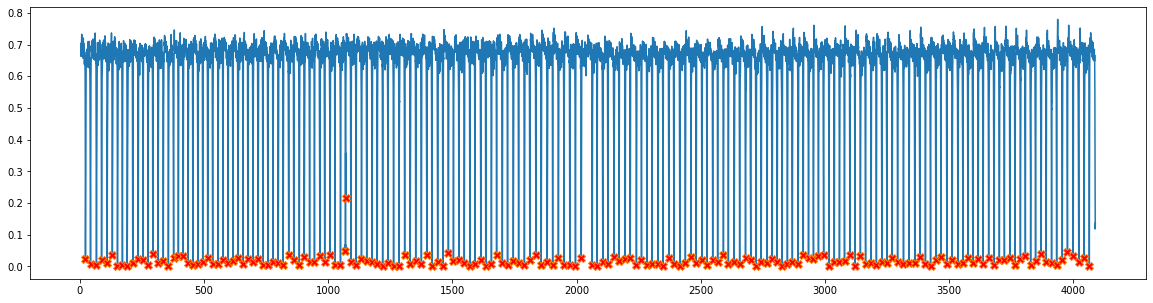

In [609]:
return_points,_=find_peaks(-df.sln,prominence=0.3)
time_return_points=pd.DataFrame(df.t[return_points],columns=['t']).reset_index()
print(time_return_points)
plt.figure(figsize=(20,5))
plt.plot(df.t,df.sln)
plt.plot(df.t[return_points], df.sln[return_points],"X",markerfacecolor='red',markersize=8)
plt.show()

In [610]:

return_points_L =return_points[1::2]



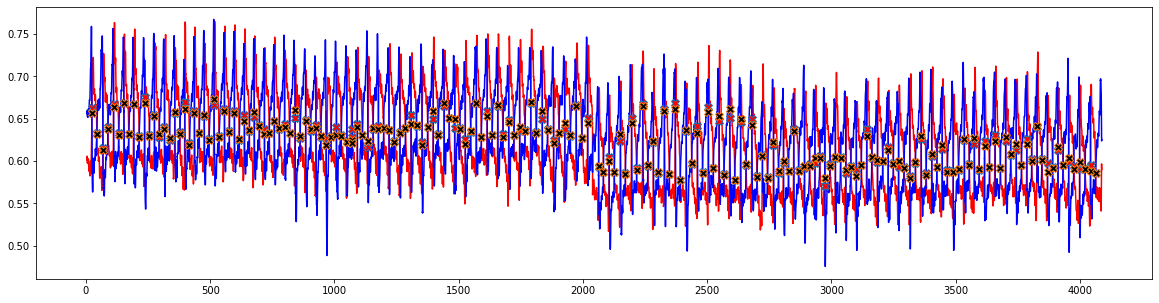

In [611]:
plt.figure(figsize=(20,5))
plt.plot(df.t,df.r_sdr,'r')
plt.plot(df.t,df.l_sdr,'b')
plt.plot(df.t[return_points], df.r_sdr[return_points],"X",markerfacecolor='red',markersize=8)
plt.plot(df.t[return_points], df.l_sdr[return_points],"X",markerfacecolor='black',markersize=8)
plt.show()

#if right shoulder value <left shoulder ,then man walking towards(front)

In [612]:
df_foward=df[df.r_sdr < df.l_sdr] 
df_backward=df[df.r_sdr > df.l_sdr]
df_foward =df_foward.reset_index()
df_backward=df_backward.reset_index()
print(df_foward)
print(df_backward)

       index       ubh            t        sl       sln    center     r_sdr  \
0          0  0.079755     5.152827  0.053248  0.667654 -0.086548  0.603388   
1          1  0.082514     5.273678  0.055138  0.668226 -0.066823  0.600355   
2          2  0.081438     5.376254  0.054023  0.663364 -0.051940  0.605712   
3          3  0.079631     5.477815  0.054513  0.684565 -0.064243  0.604281   
4          4  0.080311     5.581614  0.054419  0.677604 -0.069311  0.603178   
...      ...       ...          ...       ...       ...       ...       ...   
18563  36499  0.266272  4087.522390  0.031528  0.118407 -0.092827  0.593685   
18564  36500  0.264040  4087.635453  0.031812  0.120484 -0.078450  0.591892   
18565  36501  0.264014  4087.747621  0.033093  0.125345 -0.083492  0.590968   
18566  36502  0.261510  4087.862554  0.034731  0.132808 -0.083657  0.590133   
18567  36503  0.259859  4087.976364  0.035524  0.136705 -0.085750  0.589890   

          l_sdr       h_R       f_R       h_L      

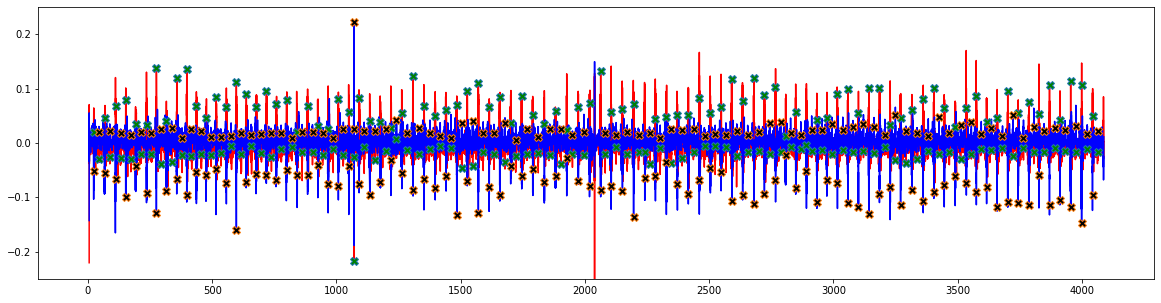

In [613]:
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(df.t, df.r_sdr, k=4, s=0)
r_sdr_diff= spl.derivative()
spl = UnivariateSpline(df.t, df.l_sdr, k=4, s=0)
l_sdr_diff= spl.derivative()

plt.figure(figsize=(20,5))
plt.ylim(-0.25,0.25)
plt.plot(df.t,r_sdr_diff(df.t),'r')
plt.plot(df.t,l_sdr_diff(df.t),'b')
plt.plot(df.t[return_points], r_sdr_diff(df.t)[return_points],"X",markerfacecolor='green',markersize=8)
plt.plot(df.t[return_points], l_sdr_diff(df.t)[return_points],"X",markerfacecolor='black',markersize=8)
plt.show()

In [614]:
diff_r=r_sdr_diff(df.t)[return_points]
diff_l=l_sdr_diff(df.t)[return_points]

if diff_r[0]>diff_l[0]:
    return_points_front = return_points[::2]
    return_points_back = return_points[1::2]
    plus=1
    minus=0
elif diff_l[0]>diff_r[0]:
    return_points_front = return_points[1::2]
    return_points_back = return_points[::2]
    minus=0
    plus=0
else:
    print('error')
    

# time parameters

# right

# forward

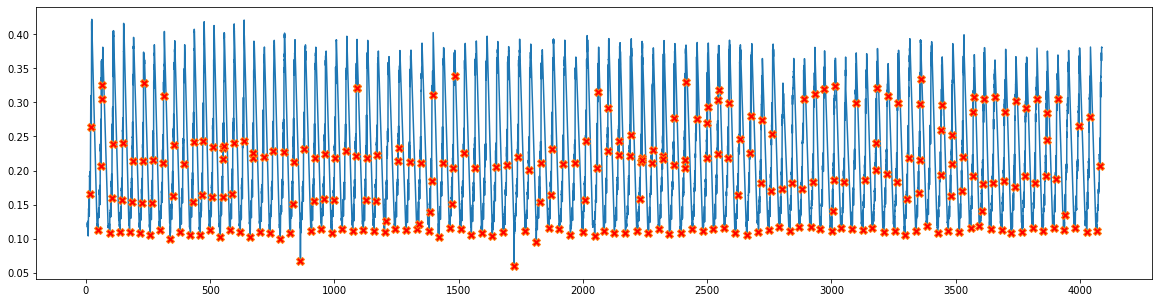

In [615]:
peaks=get_peaks(df_foward,df_foward.h_R,0.03)

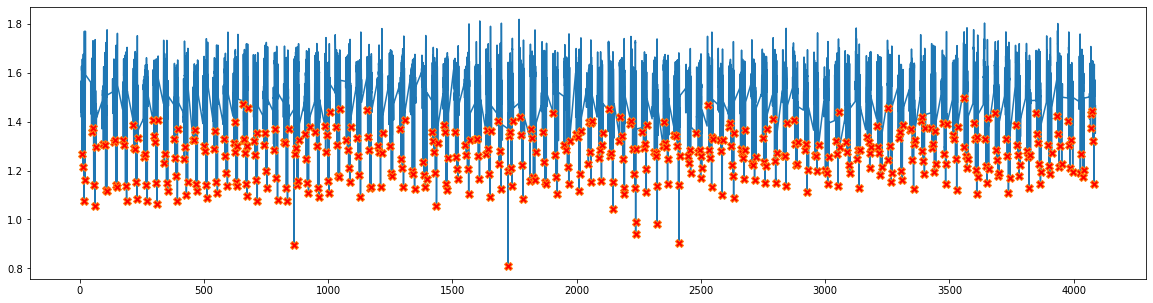

In [616]:
df_foward['norm_h_R']=(df_foward.h_R/df_foward.ubh)
peaks=get_peaks(df_foward,df_foward.norm_h_R,0.2)
 


In [617]:
Time_to_index_ratio=(peaks[1]-peaks[0])/(df.t[peaks[1]]-df.t[peaks[0]])
print(Time_to_index_ratio)

8.839835239573853


[4.185598373413086, 4.034012794494629, 3.950216770172119, 6.015203237533569, 4.488908052444458, 3.871636152267456, 4.134217977523804, 4.086345672607422, 9.41611361503601, 4.599224328994751, 4.574112892150879, 4.079591989517212, 7.106834650039673, 4.134546756744385, 3.994093656539917, 4.174973011016846, 6.159606456756592, 4.6474714279174805, 4.099066257476807, 4.262824773788452, 3.509007692337036, 3.242373466491699, 4.556166410446167, 3.9820051193237305, 3.918278694152832, 4.367791652679443, 3.265033483505249, 4.613573312759399, 4.275007724761963, 4.237106561660767, 3.4617819786071777, 3.1635019779205322, 4.357268333435059, 4.055877208709717, 4.060267925262451, 2.0665202140808105, 3.858612537384033, 5.675786733627319, 4.411622047424316, 4.5031960010528564, 4.449439287185669, 4.554556131362915, 4.885947227478027, 4.20791482925415, 3.570539951324463, 4.14037299156189, 4.446044683456421, 4.133562326431274, 4.613852500915527, 2.6360654830932617, 3.7728335857391357, 4.80781364440918, 4.31738

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


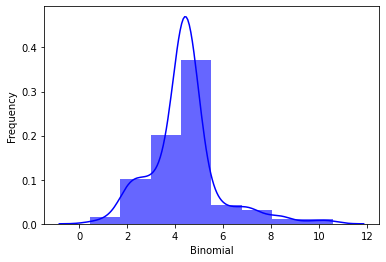

In [618]:
dt_foward_right=time_diff(peaks)
print(dt_foward_right)
distribution(dt_foward_right)

[4.185598373413086, 4.034012794494629, 3.950216770172119, 4.488908052444458, 3.871636152267456, 4.134217977523804, 4.086345672607422, 4.599224328994751, 4.574112892150879, 4.079591989517212, 4.134546756744385, 3.994093656539917, 4.174973011016846, 4.6474714279174805, 4.099066257476807, 4.262824773788452, 3.509007692337036, 3.242373466491699, 4.556166410446167, 3.9820051193237305, 3.918278694152832, 4.367791652679443, 3.265033483505249, 4.613573312759399, 4.275007724761963, 4.237106561660767, 3.4617819786071777, 3.1635019779205322, 4.357268333435059, 4.055877208709717, 4.060267925262451, 2.0665202140808105, 3.858612537384033, 4.411622047424316, 4.5031960010528564, 4.449439287185669, 4.554556131362915, 4.885947227478027, 4.20791482925415, 3.570539951324463, 4.14037299156189, 4.446044683456421, 4.133562326431274, 4.613852500915527, 2.6360654830932617, 3.7728335857391357, 4.80781364440918, 4.317381858825684, 4.089892625808716, 4.242293834686279, 4.078588962554932, 4.280057430267334, 4.4606

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


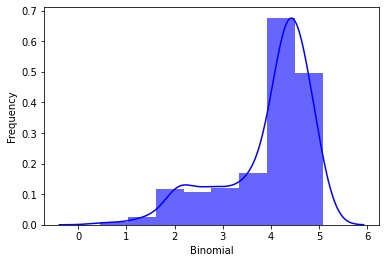

In [619]:
dt_foward_right_new=remove_time_gap(dt_foward_right)
print(dt_foward_right_new)
distribution(dt_foward_right_new)

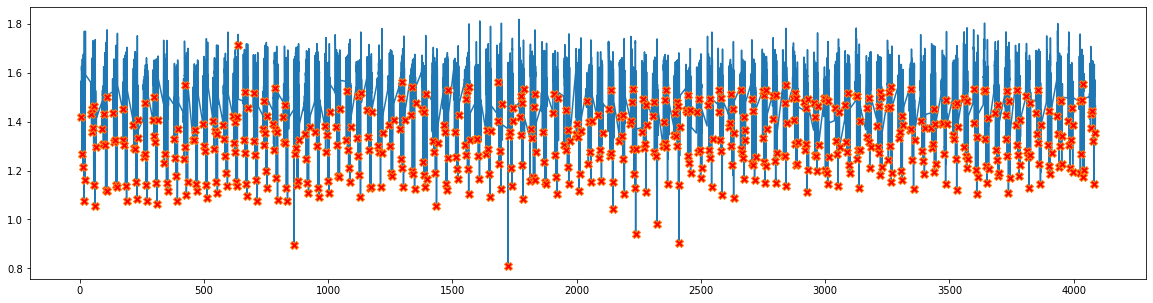

In [620]:
foward_peaks_R=remove_distinc(dt_foward_right,df_foward,Time_to_index_ratio,df_foward.norm_h_R)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


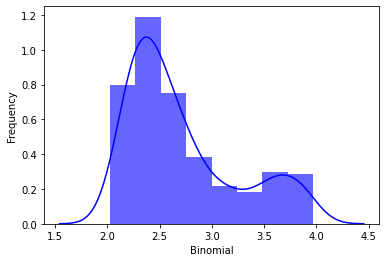

In [621]:
dt_foward_right=time_diff(foward_peaks_R)
dt_foward_right_cleaned=remove_time_gap(dt_foward_right)
distribution(dt_foward_right_cleaned)

# backward direction

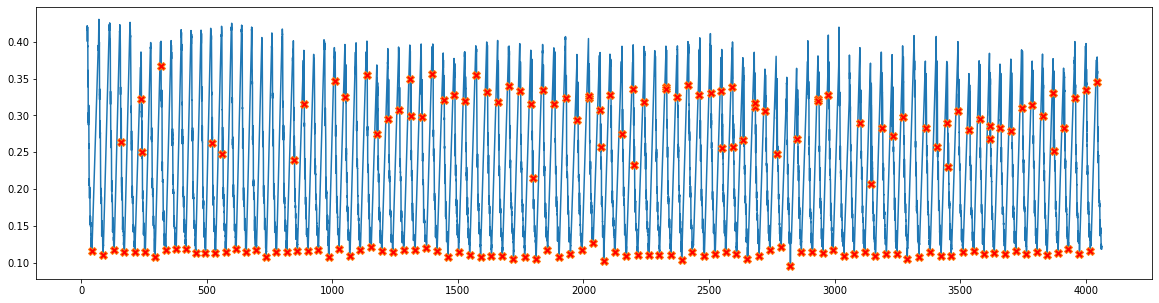

In [622]:
peaks=get_peaks(df_backward,df_backward.h_R,0.03)

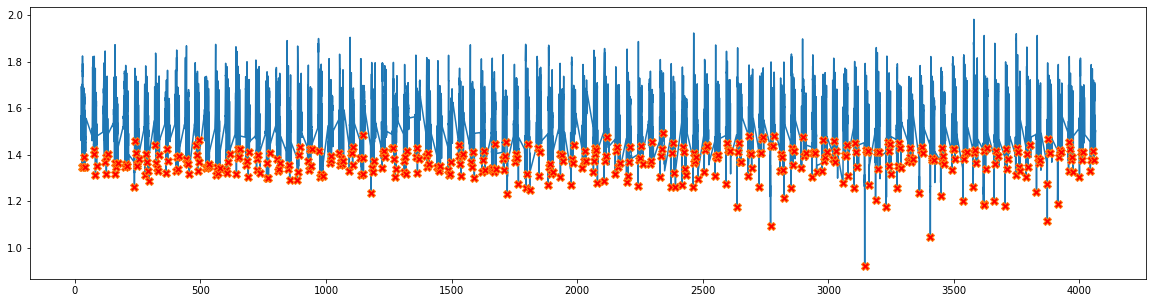

In [623]:
df_backward['norm_h_R']=(df_backward.h_R/df_backward.ubh)
peaks=get_peaks(df_backward,df_backward.norm_h_R,0.2)

[3.734924554824829, 4.367532014846802, 3.9544172286987305, 11.352215051651001, 3.3417532444000244, 3.9289512634277344, 4.7554590702056885, 9.861855506896973, 4.344972372055054, 2.96152925491333, 6.6548802852630615, 5.730708837509155, 3.5898046493530273, 3.4844918251037598, 7.046121835708618, 8.325729370117188, 3.3496313095092773, 4.2424468994140625, 8.164302825927734, 3.2811269760131836, 1.5699055194854736, 4.100744724273682, 2.571589231491089, 6.863418817520142, 4.486624240875244, 3.5955281257629395, 4.124911069869995, 4.476816415786743, 2.4925620555877686, 3.6617908477783203, 3.8175714015960693, 4.114750385284424, 4.179130792617798, 5.0858073234558105, 5.287108421325684, 3.21882963180542, 4.159914493560791, 15.100282669067383, 4.746532678604126, 2.4121387004852295, 6.316338777542114, 5.614047288894653, 3.468102216720581, 4.529112100601196, 6.457306623458862, 5.5878026485443115, 3.1108105182647705, 4.06852126121521, 4.232375860214233, 1.7390601634979248, 6.09454870223999, 4.6448700428

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


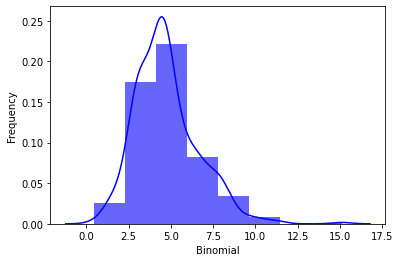

In [624]:
dt_backward_right=time_diff(peaks)
print(dt_backward_right)
distribution(dt_backward_right)

[3.734924554824829, 4.367532014846802, 3.9544172286987305, 3.3417532444000244, 3.9289512634277344, 4.7554590702056885, 4.344972372055054, 2.96152925491333, 3.5898046493530273, 3.4844918251037598, 3.3496313095092773, 4.2424468994140625, 3.2811269760131836, 1.5699055194854736, 4.100744724273682, 2.571589231491089, 4.486624240875244, 3.5955281257629395, 4.124911069869995, 4.476816415786743, 2.4925620555877686, 3.6617908477783203, 3.8175714015960693, 4.114750385284424, 4.179130792617798, 5.0858073234558105, 5.287108421325684, 3.21882963180542, 4.159914493560791, 4.746532678604126, 2.4121387004852295, 5.614047288894653, 3.468102216720581, 4.529112100601196, 5.5878026485443115, 3.1108105182647705, 4.06852126121521, 4.232375860214233, 1.7390601634979248, 4.644870042800903, 3.042701482772827, 4.1419148445129395, 2.27864933013916, 3.3514351844787598, 4.131732225418091, 4.999174118041992, 3.191328763961792, 4.7825775146484375, 3.166302442550659, 3.8079352378845215, 2.610452651977539, 5.497532367

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


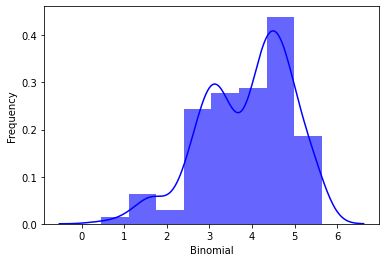

In [625]:
dt_backward_right_new=remove_time_gap(dt_backward_right)
print(dt_backward_right_new)
distribution(dt_backward_right_new)

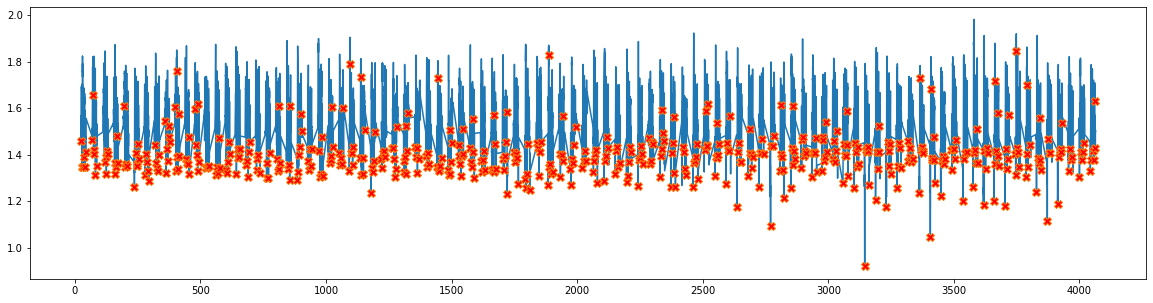

In [626]:
backward_peaks_R=remove_distinc(dt_backward_right,df_backward,Time_to_index_ratio,df_backward.norm_h_R)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


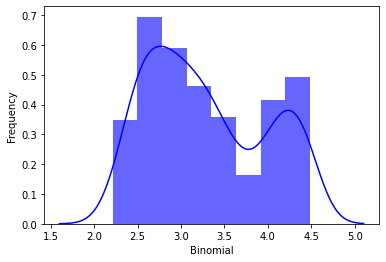

In [627]:
dt_backward_right=time_diff(backward_peaks_R)
dt_backward_right_cleaned=remove_time_gap(dt_backward_right)
distribution(dt_backward_right_cleaned)

# left

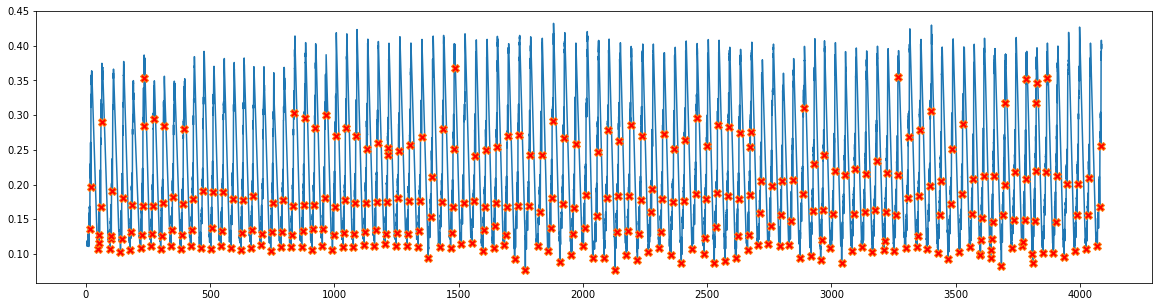

In [628]:
peaks=get_peaks(df_foward,df_foward.h_L,0.03)

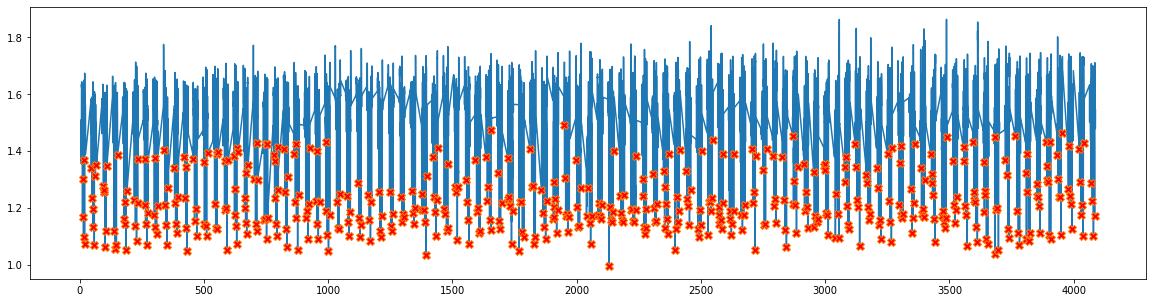

In [629]:
df_foward['norm_h_L']=(df_foward.h_L/df_foward.ubh)
peaks=get_peaks(df_foward,df_foward.norm_h_L,0.2)
 

[1.3008418083190918, 2.7431275844573975, 2.17728590965271, 1.8435094356536865, 6.942009687423706, 3.190185070037842, 2.5806772708892822, 1.6886212825775146, 4.031852960586548, 4.207459926605225, 4.257338523864746, 7.433604717254639, 2.0953283309936523, 1.8704469203948975, 2.4688148498535156, 4.367280960083008, 4.278735160827637, 7.016672849655151, 4.023352384567261, 4.08762264251709, 4.710538387298584, 6.165340900421143, 2.396810531616211, 1.719902753829956, 4.146153211593628, 5.129412889480591, 6.020880699157715, 4.199120283126831, 4.077388525009155, 4.073213815689087, 1.9412837028503418, 5.914098739624023, 2.4764814376831055, 1.761181354522705, 4.563945770263672, 4.907660245895386, 5.8198723793029785, 2.330968141555786, 1.6830801963806152, 4.112826108932495, 5.291485786437988, 4.078624725341797, 2.4523468017578125, 4.145594120025635, 4.347906589508057, 5.410514831542969, 1.6781668663024902, 2.3999381065368652, 4.022086143493652, 4.908334732055664, 4.8431291580200195, 5.17387127876281

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


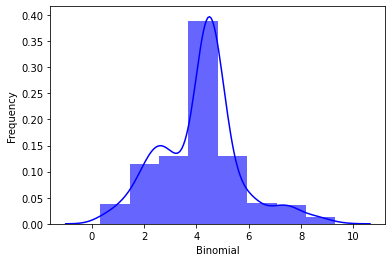

In [630]:
dt_foward_left=time_diff(peaks)
print(dt_foward_left)
distribution(dt_foward_left)

[1.3008418083190918, 2.7431275844573975, 2.17728590965271, 1.8435094356536865, 3.190185070037842, 2.5806772708892822, 1.6886212825775146, 4.031852960586548, 4.207459926605225, 4.257338523864746, 2.0953283309936523, 1.8704469203948975, 2.4688148498535156, 4.367280960083008, 4.278735160827637, 4.023352384567261, 4.08762264251709, 4.710538387298584, 2.396810531616211, 1.719902753829956, 4.146153211593628, 4.199120283126831, 4.077388525009155, 4.073213815689087, 1.9412837028503418, 2.4764814376831055, 1.761181354522705, 4.563945770263672, 4.907660245895386, 2.330968141555786, 1.6830801963806152, 4.112826108932495, 4.078624725341797, 2.4523468017578125, 4.145594120025635, 4.347906589508057, 1.6781668663024902, 2.3999381065368652, 4.022086143493652, 4.908334732055664, 4.8431291580200195, 2.0038211345672607, 4.419925689697266, 2.1620097160339355, 1.9512248039245605, 4.2927234172821045, 4.265390634536743, 1.9465138912200928, 4.246235609054565, 4.216326475143433, 4.875631332397461, 4.1686115264

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


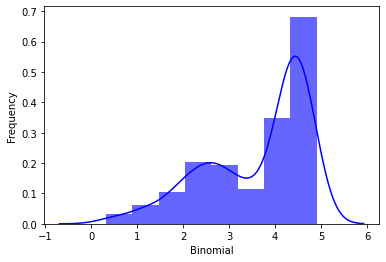

In [631]:
dt_foward_left_new=remove_time_gap(dt_foward_left)
print(dt_foward_left_new)
distribution(dt_foward_left_new)

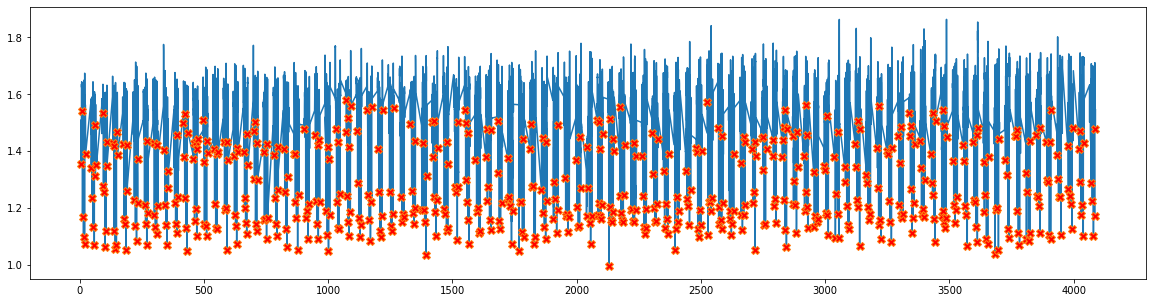

In [632]:
foward_peaks_L=remove_distinc(dt_foward_left,df_foward,Time_to_index_ratio,df_foward.norm_h_L)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


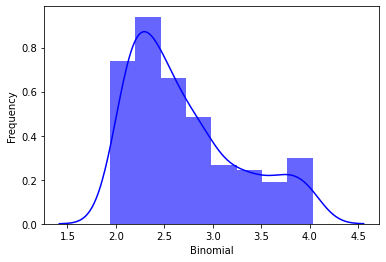

In [633]:
dt_foward_left=time_diff(foward_peaks_L)
dt_foward_left_cleaned=remove_time_gap(dt_foward_left)
distribution(dt_foward_left_cleaned)

# left-backward

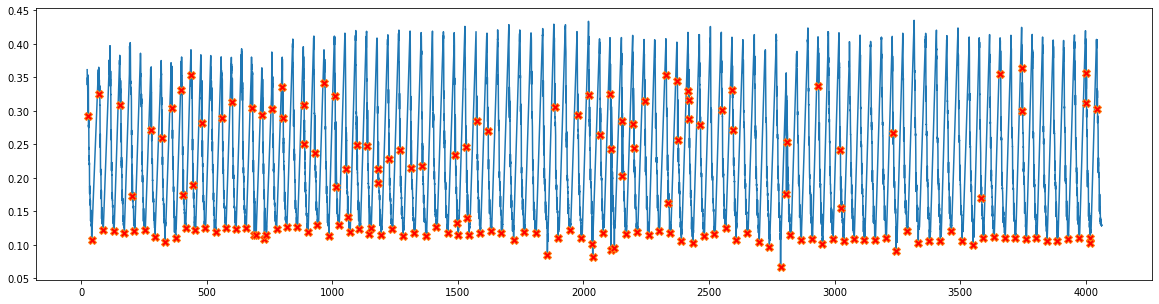

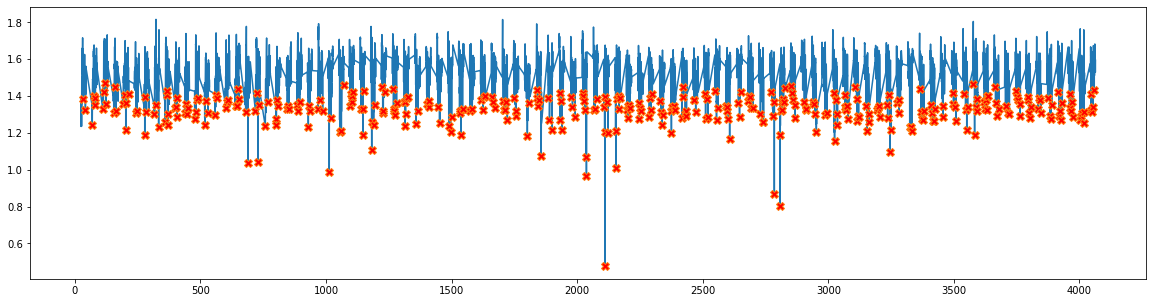

[8.713514566421509, 3.5578689575195312, 6.285174369812012, 4.137025356292725, 1.863269329071045, 7.791365385055542, 4.1811864376068115, 3.930346965789795, 3.919098138809204, 12.89126706123352, 3.210872173309326, 3.943455696105957, 9.71515440940857, 8.99788784980774, 1.3032300472259521, 2.4584147930145264, 9.525304079055786, 6.538020849227905, 5.525684356689453, 10.150172233581543, 2.6977853775024414, 4.345791578292847, 10.79184103012085, 7.811425685882568, 8.766765117645264, 4.31205677986145, 6.506522178649902, 2.697415590286255, 1.6803243160247803, 2.6439807415008545, 8.988883018493652, 4.6454572677612305, 1.7834129333496094, 2.2155940532684326, 10.855278253555298, 4.36401104927063, 1.8380627632141113, 6.723022222518921, 8.358038902282715, 2.9215807914733887, 4.018499135971069, 4.030646562576294, 6.785264253616333, 4.290943384170532, 8.655065774917603, 7.37564492225647, 4.899825811386108, 3.874931812286377, 12.53297233581543, 5.454613447189331, 2.7542922496795654, 12.576742172241211, 

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


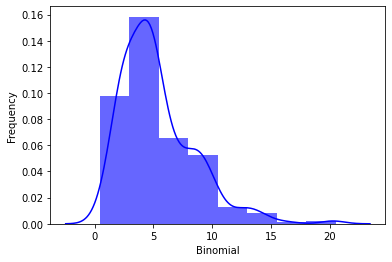

[3.5578689575195312, 6.285174369812012, 4.137025356292725, 1.863269329071045, 4.1811864376068115, 3.930346965789795, 3.919098138809204, 3.210872173309326, 3.943455696105957, 1.3032300472259521, 2.4584147930145264, 6.538020849227905, 5.525684356689453, 2.6977853775024414, 4.345791578292847, 4.31205677986145, 6.506522178649902, 2.697415590286255, 1.6803243160247803, 2.6439807415008545, 4.6454572677612305, 1.7834129333496094, 2.2155940532684326, 4.36401104927063, 1.8380627632141113, 6.723022222518921, 2.9215807914733887, 4.018499135971069, 4.030646562576294, 6.785264253616333, 4.290943384170532, 4.899825811386108, 3.874931812286377, 5.454613447189331, 2.7542922496795654, 4.0940797328948975, 3.838141441345215, 4.156797647476196, 5.815664291381836, 5.630389213562012, 2.434568405151367, 5.925367832183838, 1.5465178489685059, 3.34822940826416, 4.248122930526733, 2.6392147541046143, 4.6844482421875, 3.0178892612457275, 6.452626943588257, 2.596064805984497, 4.396881103515625, 5.1799681186676025

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


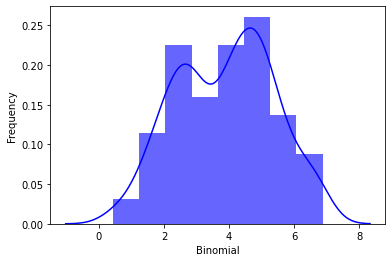

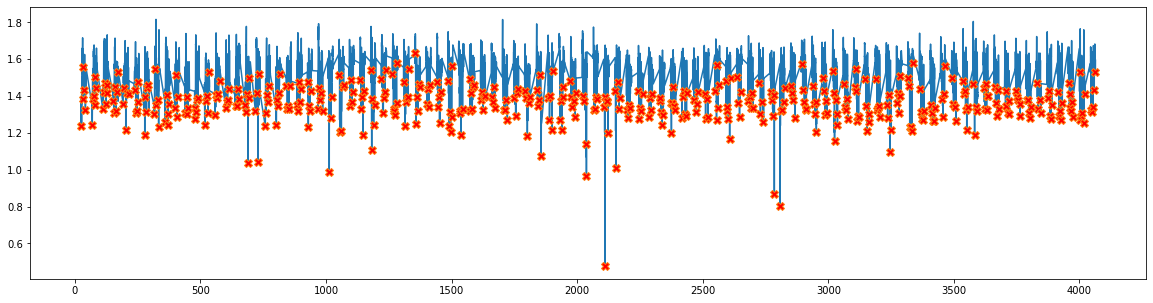

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


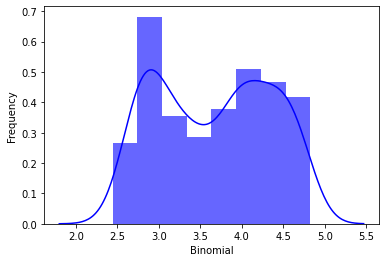

In [634]:
peaks=get_peaks(df_backward,df_backward.h_L,0.03)
df_backward['norm_h_L']=(df_backward.h_L/df_backward.ubh)
peaks=get_peaks(df_backward,df_backward.norm_h_L,0.2)
dt_backward_left=time_diff(peaks)
print(dt_backward_left)
distribution(dt_backward_left)

dt_backward_left_new=remove_time_gap(dt_backward_left)
print(dt_backward_left_new)
distribution(dt_backward_left_new)

backward_peaks_L=remove_distinc(dt_backward_left,df_backward,Time_to_index_ratio,df_backward.norm_h_L)

dt_backward_left=time_diff(backward_peaks_L)
dt_backward_left_cleaned=remove_time_gap(dt_backward_left)
distribution(dt_backward_left_cleaned)

# sampling right leg

In [635]:
sample_strikes_foward_R=sample(df_foward,foward_peaks_R,time_return_points)
sample_strikes_backward_R=sample(df_backward,backward_peaks_R,time_return_points)

In [636]:
strides_foward_R=strides(sample_strikes_foward_R)
strides_backward_R=strides(sample_strikes_backward_R)
print(strides_foward_R)
print('\n')
print(strides_backward_R)

[[], [3.2741029262542725, 2.4012691974639893, 2.200531005859375, 4.045844554901123, 2.17748761177063, 2.1714463233947754, 4.131192922592163], [], [6.049961566925049, 2.402217149734497, 2.1618309020996094, 4.572096586227417, 4.163377046585083, 2.1671998500823975], [], [2.9301493167877197, 4.273536682128906, 4.246018648147583, 4.438611268997192], [], [3.032914876937866, 4.662284851074219, 4.172356843948364, 4.304659843444824], [], [3.2820332050323486, 4.6831135749816895, 4.186326742172241, 4.223393440246582, 2.256826400756836, 2.545401096343994], [], [2.5609872341156006, 2.1629445552825928, 4.24900221824646, 4.364993095397949], [], [3.201986312866211, 2.2465336322784424, 2.312534809112549, 4.309275388717651, 4.356992483139038, 2.231300115585327], [], [5.875750541687012, 4.564539194107056, 4.54785418510437], [], [4.645421028137207, 4.497097015380859, 4.503804922103882, 3.830984354019165], [], [2.410224676132202, 2.261833429336548, 4.240422487258911, 4.676690578460693], [], [3.709535360336

In [637]:
avg_stride_foward_R=list(map(lambda a : np.mean(a), strides_foward_R[plus::2]))
avg_stride_backward_R=list(map(lambda a : np.mean(a), strides_backward_R[minus::2]))
print(avg_stride_foward_R)
print('\n')
print(avg_stride_backward_R)

[2.9145535060337613, 3.5861138502756753, 3.9720789790153503, 4.043054103851318, 3.5295157432556152, 3.3344817757606506, 3.1097704569498696, 4.9960479736328125, 4.369326829910278, 3.3972927927970886, 4.2560847997665405, 4.295776188373566, 3.6685304641723633, 4.290727436542511, 2.783749920981271, 3.5315649032592775, 3.358596920967102, 2.72758412361145, 2.930156628290812, 3.294552516937256, 4.144685935974121, 4.495580554008484, 4.603283802668254, 3.9215455055236816, 4.418176054954529, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 3.8589787006378176, 4.743928790092468, 3.304200792312622, 4.13934555053711, 3.0052316784858704, 3.1755564212799072, 4.032700181007385, 2.962669014930725, 2.888417750597, 3.1401531298955283, 3.5597879886627197, 3.4984118938446045, 2.6873563289642335, 3.231224911553519, 2.797447783606393, 3.337029981613159, 2.6311057976314, 3.403080463409424, 3.0573006153106688, 2.8601550374712263, 2.8094069163004556, 

/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# sampling-left leg

In [638]:
sample_strikes_foward_L=sample(df_foward,foward_peaks_L,time_return_points)
sample_strikes_backward_L=sample(df_backward,backward_peaks_L,time_return_points)

In [639]:
strides_foward_L=strides(sample_strikes_foward_L)
strides_backward_L=strides(sample_strikes_backward_L)
print(strides_foward_L)
print('\n')
print(strides_backward_L)

[[], [3.2717745304107666, 4.411108016967773, 4.237379789352417, 2.277315855026245, 2.0875375270843506, 4.202467441558838], [], [2.8871960639953613, 2.074110746383667, 4.297466278076172, 4.417163610458374, 2.2919464111328125, 2.0579280853271484], [], [2.825164318084717, 2.190297842025757, 4.239814281463623, 4.363666534423828, 2.2693729400634766, 2.7314891815185547], [], [2.834398031234741, 4.135619878768921, 4.194516181945801, 2.558363676071167, 2.626905918121338], [], [4.38607120513916, 4.315184116363525, 4.48247766494751, 2.1101906299591064], [], [4.228068113327026, 4.619734287261963, 2.4864983558654785, 2.56235671043396], [], [2.576127052307129, 4.179484844207764, 4.464186668395996, 2.5689496994018555, 3.105074644088745], [], [2.5413594245910645, 4.237610340118408, 4.4248597621917725, 2.9022154808044434, 2.593137264251709], [], [4.132595777511597, 4.614237070083618, 2.6883108615875244, 2.498243808746338], [], [3.275846004486084, 2.09076189994812, 2.122312068939209, 2.4730050563812256

In [640]:
avg_stride_foward_L=list(map(lambda a : np.mean(a), strides_foward_L[plus::2]))
avg_stride_backward_L=list(map(lambda a : np.mean(a), strides_backward_L[minus::2]))
print(avg_stride_foward_L)
print('\n')
print(avg_stride_backward_L)

[3.414597193400065, 3.0043018658955893, 3.103300849596659, 3.2699607372283936, 3.8234809041023254, 3.474164366722107, 3.378764581680298, 3.3398364543914796, 3.4833468794822693, 2.849924921989441, 2.8336613518851146, 2.961018919944763, 3.239632511138916, 3.272119426727295, 3.357318639755249, 2.687960704167684, 2.805143197377523, 3.2664912700653077, 3.4080011367797853, 3.9221328496932983, 3.90941162109375, 4.65944367647171, 2.7806124289830527, 2.8250834465026857, 3.2170120239257813, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 4.210887432098389, 2.7683608531951904, 2.91664719581604, 3.753324866294861, 3.514497756958008, 3.161522388458252, 3.6766554911931357, 4.287997436523438, 4.078314483165741, 4.990506231784821, 3.676768104235331, 3.8502557277679443, 3.1475234826405845, 3.779584455490112, 3.3018730878829956, 3.5819042682647706, 3.8884554386138914, 3.7138537764549255, 2.813952241625105, 3.3169471820195517, 2.80458764235178

/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# define feature vector array

In [641]:
TP_front=[]

In [642]:
T_f=[[[None],[None]],[[None],[None]]]

# stride time

In [643]:
def comb_dir_arrays(foward_array,backward_array,plus,minus):   
    if plus<minus:
        array=com(foward_array,backward_array)
    elif plus>minus:
        array=com(backward_array,foward_array)
    return array

In [644]:
T3=comb_dir_arrays(avg_stride_foward_R,avg_stride_backward_R,plus,minus)

In [645]:
T4=comb_dir_arrays(avg_stride_foward_L,avg_stride_backward_L,plus,minus)

In [646]:
T_f[1][0]=T3
T_f[1][1]=T4

# step time calculate

In [647]:
def step_time(right,left):
    L_array=[]
    R_array=[]
    try:
        if len(right)==len(left):
            if left[0]>right[0]:
                #print(1)
                Lstep=np.subtract(left,right) 
                L_array=Lstep
                Rstep=np.subtract(right[1:],left[:-1]) 
                R_array=Rstep
            else:
                #print(2)
                Rstep=np.subtract(right,left)
                R_array=Rstep
                Lstep=np.subtract(left[1:],right[:-1]) 
                L_array=Lstep

        elif (len(right)+1)==len(left):#when left strides are max by one
            if right[0]>left[0]:
                #print(3)
                Lstep=np.subtract(left[1:],right) 
                L_array=Lstep
                Rstep=np.subtract(right,left[:-1]) 
                R_array=Rstep

        elif len(right)==(len(left)+1):#when right strides are max by one
            if left[0]>right[0]:
                #print(4)
                Lstep=np.subtract(left,right[:-1]) 
                L_array=Lstep
                Rstep=np.subtract(right[1:],left) 
                R_array=Rstep

        else:
            #print(5)
            L_array.append('ooa')
            R_array.append('ooa')
    except:
        L_array.append('ooa')
        R_array.append('ooa')
        
    return R_array,L_array
                
    

In [648]:
def step_time_array(sample_strikes_R,sample_strikes_L):
    R_st_array=[]
    L_st_array=[]
    for i in range(len(sample_strikes_R)):
        if not len(sample_strikes_R[i])==0:
            Rst,Lst=step_time(sample_strikes_R[i],sample_strikes_L[i])
            R_st_array.append(Rst)
            L_st_array.append(Lst)
    return R_st_array,L_st_array

# foward direction

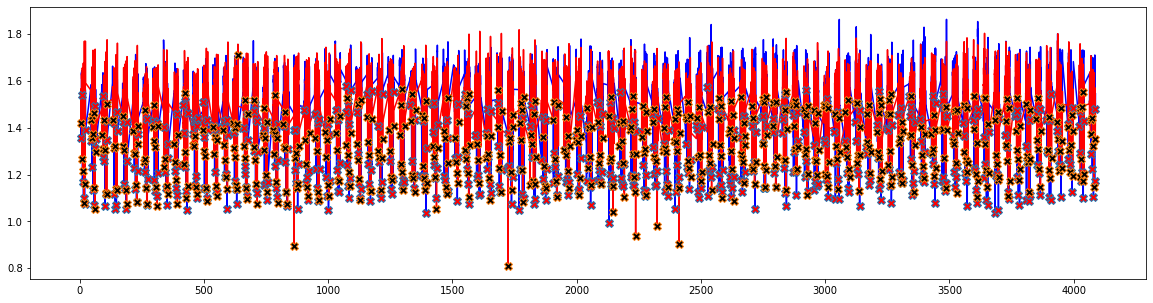

In [649]:
plt.figure(figsize=(20,5))
plt.plot(df_foward.t,df_foward.norm_h_L,'b')
plt.plot(df_foward.t,df_foward.norm_h_R,'r')
plt.plot(df_foward.t[foward_peaks_L], df_foward.norm_h_L[foward_peaks_L],"X",markerfacecolor='red',markersize=8)
plt.plot(df_foward.t[foward_peaks_R], df_foward.norm_h_R[foward_peaks_R],"X",markerfacecolor='black',markersize=8)
plt.show()

In [650]:
print(sample_strikes_foward_L)
print(sample_strikes_foward_R)

[[], [47.014949321746826, 50.28672385215759, 54.697831869125366, 58.93521165847778, 61.21252751350403, 63.30006504058838, 67.50253248214722], [], [92.95644736289978, 95.84364342689514, 97.91775417327881, 102.21522045135498, 106.63238406181335, 108.92433047294617, 110.98225855827332], [], [134.1513123512268, 136.97647666931152, 139.16677451133728, 143.4065887928009, 147.77025532722473, 150.0396282672882, 152.77111744880676], [152.77111744880676], [175.50191164016724, 178.33630967140198, 182.4719295501709, 186.6664457321167, 189.22480940818787, 191.8517153263092], [], [220.14662146568298, 224.53269267082214, 228.84787678718567, 233.33035445213318, 235.44054508209229], [], [261.1606557369232, 265.38872385025024, 270.0084581375122, 272.4949564933777, 275.05731320381165], [], [298.1351406574249, 300.71126770973206, 304.8907525539398, 309.3549392223358, 311.92388892173767, 315.0289635658264], [], [340.4853343963623, 343.02669382095337, 347.2643041610718, 351.68916392326355, 354.591379404068,

In [651]:
sample_strikes_foward_L = sample_strikes_foward_L[minus::2]
sample_strikes_foward_R = sample_strikes_foward_R[minus::2]

In [652]:
step_foward_R,_=step_time_array(sample_strikes_foward_R,sample_strikes_foward_L)
step_foward_L,_=step_time_array(sample_strikes_foward_L,sample_strikes_foward_R)

In [653]:
print(step_foward_R)
print(step_foward_L)

[array([19.92320275]), ['ooa'], ['ooa'], ['ooa'], ['ooa'], [], array([ 0.        , -2.09388876, -2.07159638, -2.01259732, -1.49214935,
       -0.22498465]), [], array([2.55926871, 2.6570766 , 2.34975672, 2.32572579]), ['ooa'], array([ 2.55425382, -0.11671233, -2.07063198, -2.16774535, -0.12515831,
        1.73347735]), [], ['ooa'], array([2.30142689, 2.555897  , 2.29379535, 2.31916833, 2.55831075]), array([2.2440989 , 2.16014624, 2.33191943, 3.93945694]), [], array([3.57943034, 2.47673488, 2.36182189, 2.33792949]), [], [], [], [], ['ooa'], ['ooa'], array([0.8625288 , 2.56721115, 2.4457221 , 2.49072576, 0.24856114]), ['ooa'], array([ 2.45807338,  0.11937642, -2.1510725 , -2.37343383, -0.11890554,
        2.43008018]), ['ooa'], ['ooa'], ['ooa']]
[array([], dtype=float64), ['ooa'], ['ooa'], ['ooa'], ['ooa'], [], array([0.        , 2.09388876, 2.07159638, 2.01259732, 1.49214935,
       0.22498465]), [], array([2.06205058, 2.07281113, 2.09592032, 2.20161343, 0.11723757]), ['ooa'], array([2.

# backward direction

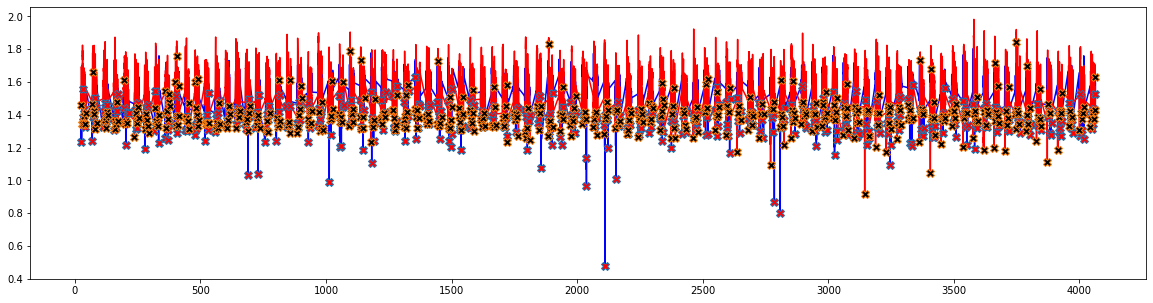

In [654]:
plt.figure(figsize=(20,5))
plt.plot(df_backward.t,df_backward.norm_h_L,'b')
plt.plot(df_backward.t,df_backward.norm_h_R,'r')
plt.plot(df_backward.t[backward_peaks_L], df_backward.norm_h_L[backward_peaks_L],"X",markerfacecolor='red',markersize=8)
plt.plot(df_backward.t[backward_peaks_R], df_backward.norm_h_R[backward_peaks_R],"X",markerfacecolor='black',markersize=8)
plt.show()

In [655]:
print(sample_strikes_backward_L)
print(sample_strikes_backward_R)

[[24.789422512054443, 30.888444662094116, 33.550474405288696, 37.49015974998474, 41.78101372718811], [], [69.08161067962646, 71.83943343162537, 75.36604285240173, 78.17882633209229, 81.36522555351257, 84.01331663131714], [111.21001696586609], [111.21001696586609, 115.24798083305359, 119.00731253623962, 122.775057554245, 127.15184426307678, 129.61583924293518], [], [152.98471212387085, 155.83072757720947, 158.97051978111267, 162.8911256790161, 166.94599032402039, 169.69793891906738], [192.06557369232178], [192.06557369232178, 196.19080543518066, 202.3507969379425, 209.28761386871338, 213.849271774292], [], [238.68656396865845, 242.3769190311432, 247.86745190620422, 250.3468954563141, 252.80975937843323], [], [277.98434925079346, 280.6968321800232, 285.024227142334, 288.9745934009552, 292.2627544403076], [], [316.59531140327454, 320.5605401992798, 324.5033257007599, 328.8585276603699, 333.32250118255615], [], [358.36575651168823, 364.8089032173157, 369.0565302371979, 371.5818016529083, 3

In [656]:
sample_strikes_backward_L = sample_strikes_backward_L[plus::2]
sample_strikes_backward_R = sample_strikes_backward_R[plus::2]

In [657]:
step_backward_R,_=step_time_array(sample_strikes_backward_R,sample_strikes_backward_L)
step_backward_L,_=step_time_array(sample_strikes_backward_L,sample_strikes_backward_R)

In [658]:
print(step_backward_R)
print(step_backward_L)

[['ooa'], array([3.00226307, 1.59461403, 3.76946831, 0.99522829, 4.04204512]), array([1.57837319, 0.80044198, 2.43985105, 1.83375192, 2.94745016]), array([ 0.        , -2.61460948, -2.46588421, -3.77298856, -2.2828536 ]), array([ 0.        , -1.64564538, -1.96363592, -1.64812398, -2.11039042,
        0.10642314]), [], [], array([1.63439441, 3.13283968, 2.56535864]), [], array([ 0.6640029 ,  0.65463829, -1.30814171, -0.98190188, -2.17500353,
       -0.33118606]), ['ooa'], array([0.88841796, 3.01736617, 3.65020561, 3.07870603, 0.32218933,
       1.12031937]), array([3.17507219, 2.48898005, 3.34500051, 3.73171282]), ['ooa'], ['ooa'], array([ 3.13074207,  1.77935076, -2.11258149, -0.11151767]), array([3.90753388, 2.75834823, 3.45084977, 3.97919607]), array([4.09073806, 2.71594882, 2.47470284, 4.39411807]), array([ 1.15759706, -0.5468421 , -1.37894988, -1.98510528, -0.70208764]), array([1.06083322, 2.26599097, 3.34788132, 2.89302301]), array([ 0.        , -0.92961359, -0.69937158, -2.221343

# filter ooa

In [659]:
avg_step_foward_L=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_foward_L))
avg_step_backward_L=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_backward_L))
avg_step_foward_R=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_foward_R))
avg_step_backward_R=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_backward_R))

/tmp/ipykernel_3192/1412565858.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  avg_step_foward_L=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_foward_L))
/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_3192/1412565858.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  avg_step_backward_L=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_backward_L))
/tmp/ipykernel_3192/1412565858.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will p

In [660]:
T1=comb_dir_arrays(avg_step_foward_R,avg_step_backward_R,plus,minus)
T2=comb_dir_arrays(avg_step_foward_L,avg_step_backward_L,plus,minus)

In [661]:
T_f[0][0]=T1
T_f[0][1]=T2

In [662]:
output = open('para_values/{}.pkl'.format(name), 'wb')
pickle.dump(T_f, output)
output.close()